In [28]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = '../output/'

fontsize = 28
labelsize = 20

In [29]:
df = pd.read_csv(output_folder + "propagation_result.csv", header=None)
df.columns = ['dataset', 'p', 'algo',  'exp','result','timestep_results', 'intervention_results']
# df = pd.read_csv(output_folder + "server/propagation_result_final.csv", header=None)
# df.columns = ['algo', 'dataset', 'exp2', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)

(2, 7)


,dataset,p,algo,exp,result,timestep_results,intervention_results
0,enron,0.3,naive_nbr,sir,"{24: [3649, 3590, 3625, 3636, 3627, 3614, 3604...",NaN,NaN
1,enron,0.3,naive_nbr,sir_exp2,NaN,"{24: [3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3...",NaN


enron


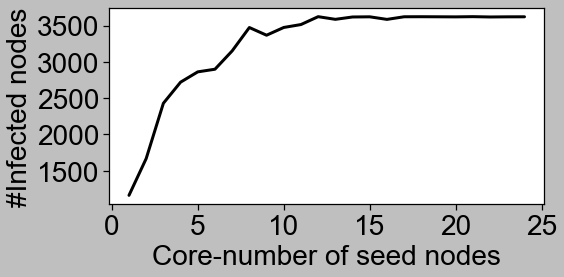

<Figure size 576x288 with 0 Axes>

In [30]:
import seaborn as sns 
# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')
lw = 3
save = True

goodname_algo = {
        'naive_nbr': 'nbr-based hyp.'
    }
df2 = df[df['exp']=='sir'].copy()
datasets = ['enron']
for key in datasets:
    print(key)
    item = df2[df2.dataset==key].copy()
    if len(item) == 0:
        continue
    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        # print(result_df) 
    # print(result_df)
    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    # print(meandf)
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', label = None, data=meandf, color='k', linewidth = lw)
                    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#Infected nodes", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.get_legend().remove()
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
    # plt.title(key)
    # ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_infected.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_infected.pdf")
        plt.show()
    plt.clf()

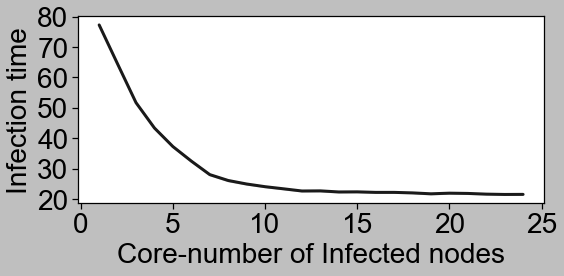

<Figure size 576x288 with 0 Axes>

In [31]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
only_algo = ['enron']
group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
df2 = df[df['exp']=='sir_exp2'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    
    
    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k', linewidth = lw)
    plt.xlabel('Core-number of Infected nodes', fontsize=fontsize)
    plt.ylabel("Infection time", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    # plt.title(goodname_algo[key[0]], fontsize=fontsize)
    plt.tight_layout()
    #  Add redline on the MAX_ITERATION
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_firstinf.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_firstinf.pdf")
        plt.show()
        # break
    plt.clf()

In [36]:
df_nbr = pd.read_csv("../output/propagation_result_recursive_delinner_enron_naive_nbr3.csv", header=None)
df_nbr.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']
df_nbr.head()

,dataset,p,algo,exp,result,timestep_results,intervention_results
0,enron,0.3,naive_nbr,sir_exp3,NaN,NaN,"{0: {24: [3622, 3620, 3635, 3644, 3638, 3630, ..."


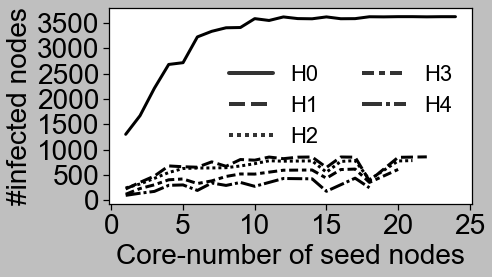

<Figure size 504x288 with 0 Axes>

In [42]:
import pandas as pd
import seaborn as sns 
from ast import literal_eval
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')
save = True

# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12


# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize':(7,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
# plt.rcParams['figure.figsize'] = (8, 4)
lw = 3
save = True
topk = 5 

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact','default']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# df = pd.read_csv(os.path.join("data/output/propagation_result_topk_exp3.csv"), header=None)
# df.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']
# print(df.shape)
# print(df.head(10))
df2 = df_nbr[df_nbr['exp']=='sir_exp3'].copy()
for key in df2.dataset.unique():
    # there should be only one result
    item = df2[df2.dataset == key].copy()
    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1
    
    result = literal_eval(item['intervention_results'].iloc[0])
    # print(result.keys())
    # print(result['top5'].keys())
    # print(len(result['top5'][1]))
    # for top_val in ['top5', 'top10', 'top15']:
    # print(['nill', top_val])
    
    
    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] \
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', 'infected']), \
                                 ignore_index=False)
    # print(result_df['edge id'].unique())
    # result_df['intervention'] = result_df.apply(lambda x: 'applied' if x['edge id'] != 'nill' else 'not applied', axis=1)

    #Plot mean
    meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
    # print(meandf.head(n = 10))
    # print(meandf)
    sns.lineplot(x = 'core number', y = 'infected', lw= lw, style = 'hypergraph',  data=meandf)
    
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    plt.ylabel("#infected nodes", fontsize=fontsize)
    # plt.yscale("log")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.title(goodname_algo[key[2]], fontsize=fontsize)
    leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
    
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.tight_layout()
    filename = key
    if(save):
        plt.savefig("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
    else:
        print("../fig/" + filename + "_innercoreImpact.pdf")
        plt.show()
        # break 
    plt.clf()


In [43]:
from hgDecompose.utils import load_dict 
d = load_dict()

Loading dictionary from:  tests/tmp/temp.pkl


In [54]:
# # d.keys()
# print(len(d[0]))
# d[0]

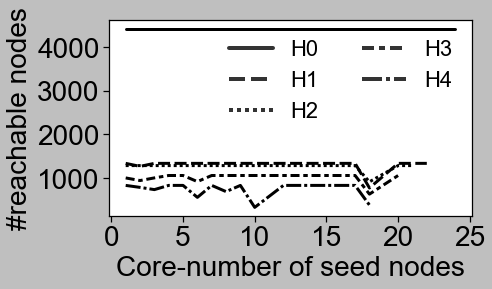

<Figure size 504x288 with 0 Axes>

In [48]:
import numpy as np
from matplotlib import pyplot as plt 
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("ticks")
plt.style.use('grayscale')

lw = 3
save = True
output_folder = '../fig/'

int_dict = {'core number': [], 'Avg. conn. component size':[], 'hypergraph id': []}
for k, d2 in d.items():
    # print(k)
    if k>=5:
        break
    x = [] 
    y = []
    for k3,d3 in d2.items():
        # print('=>',k3,' : ',d3)
        mean = np.mean(list(d3.values()))
        # print()
        x.append(k3)
        y.append(mean)
    # plt.plot(x,y,label='H'+str(k))
    int_dict['core number']+= x
    int_dict['Avg. conn. component size']+=y
    int_dict['hypergraph id']+= ['H'+str(k)]*len(x)
    # print('------')
    # mean2  = np.mean(y)
    # print(k,mean2)

result_df = pd.DataFrame.from_dict(int_dict)

# result_df.head()
sns.lineplot(x = 'core number', y = 'Avg. conn. component size', lw=lw, style = 'hypergraph id',  data=result_df)
# plt.yscale('log')
plt.ylabel('#reachable nodes', fontsize=fontsize)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc='best', fontsize=fontsize-6, ncol=2, frameon=False)
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
plt.tight_layout()
filename = 'Explain_enron'
if(save):
    plt.savefig(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
else:
    print(output_folder + filename + "_innercoreImpact.pdf")
    plt.show()
    # break 
plt.clf()

In [56]:

src = '../output/'
cols = ['algo', 'dataset', 'exp', 'intervention_results', 'p', 'timestep_results', 'result']
# cols = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_nbr = pd.read_csv(src+"propagation_result_recursive_delinner_enron_naive_nbr3.csv", header=None)
df_nbr.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_degree = pd.read_csv(src+"propagation_result_recursive_delinner_enron_naive_degree3.csv", header=None)
df_degree.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df_graph_core = pd.read_csv(src+"propagation_result_recursive_delinner_enron_graph_core3.csv", header=None)
df_graph_core.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']

df = pd.concat([df_nbr, df_degree, df_graph_core])
df.head(n=10)

,dataset,p,algo,exp,result,timestep_results,intervention_results
0,enron,0.3,naive_nbr,sir_exp3,NaN,NaN,"{0: {24: [3622, 3620, 3635, 3644, 3638, 3630, ..."
0,enron,0.3,naive_degree,sir_exp3,NaN,NaN,"{0: {11: [3616, 3622, 3644, 3619, 3610, 3651, ..."
0,enron,0.3,graph_core,sir_exp3,NaN,NaN,"{0: {40: [3622, 3602, 3615, 3630, 3629, 3628, ..."


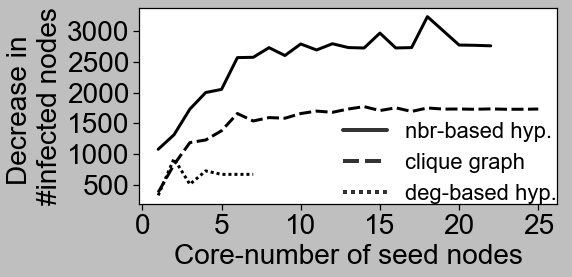

<Figure size 576x288 with 0 Axes>

In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')

# from matplotlib.ticker import MaxNLocator
# sns.set(rc={'figure.figsize': (7, 4)})
# plt.rcParams['figure.figsize'] = (7,5)


lw = 3
save = True
output_folder = '../fig/'
topk = 5

ignore_datasets = ['bin_1', 'bin_2', 'bin_4',
                   'bin_5', 'congress', 'contact', 'default']
group_list = ['dataset', 'p', 'algo']
goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
df_plot = None

for key, item in df[df['intervention_results'].notnull()].groupby(group_list, as_index=False):

    item['algo'] = item['algo'].replace(goodname_algo)
    assert len(item['algo'].unique()) == 1

    result = literal_eval(item['intervention_results'].iloc[0])

    result_df = pd.DataFrame()
    result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk]
                    for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
    result_df = result_df.append(pd.DataFrame(result_tuple, columns=[
                                 'hypergraph', 'core number', 'infected']), ignore_index=False)

    # Plot mean
    meandf = result_df.groupby(
        ['hypergraph', 'core number']).mean().reset_index()

    merged_df = pd.merge(meandf[meandf['hypergraph'] == "H0"], meandf[meandf['hypergraph'] == "H1"],
                         how="right", on=["core number"])
    merged_df['infected difference'] = merged_df.apply(
        lambda x: x['infected_x'] - x['infected_y'], axis=1)
    merged_df['Decomposition'] = goodname_algo[key[2]]

    merged_df.drop(['infected_x', 'infected_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)

    # print(merged_df)

    if(df_plot is None):
        df_plot = merged_df.copy()
    else:
        df_plot = df_plot.append(merged_df,ignore_index=True)

# print(df_plot.head(10))    
sns.lineplot(x = 'core number', y = 'infected difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
plt.ylabel("Decrease in \n#infected nodes", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
leg = plt.legend(loc="best", fontsize=fontsize-6,frameon=False,bbox_to_anchor=(0.44,0.52))
for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

plt.tight_layout()
filename = key[0] + "_diff_btn_H0_and_H1"
if(save):
    plt.savefig(output_folder + filename + ".pdf")
    plt.show()
else:
    print(filename)
    plt.show()
    # break
plt.clf()

../output/enron_naive_nbr_sp4.pkl
1
22
../output/enron_graph_core_sp4.pkl
1
25
../output/enron_naive_degree_sp4.pkl
1
7


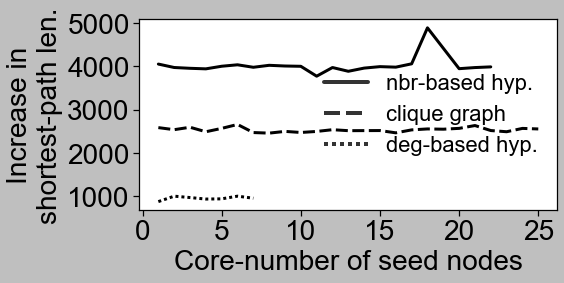

../output/enron_naive_nbr_comp4.pkl
1
22
../output/enron_graph_core_comp4.pkl
1
25
../output/enron_naive_degree_comp4.pkl
1
7


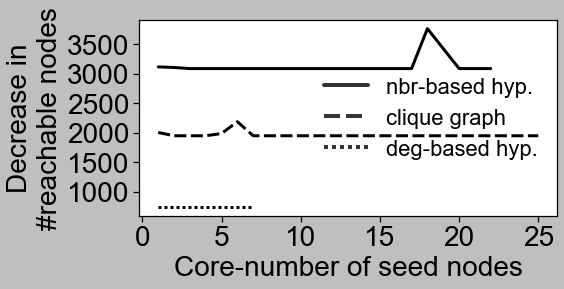

<Figure size 576x288 with 0 Axes>

In [70]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_style("ticks")
plt.style.use('grayscale')
# plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True


# fontsize = 28
# labelsize = 12
save = True
good_name_y = {
    "sp" : "\nshortest-path len.", 
    "comp" : "\n#reachable nodes"
}
dataset_name = 'enron'
upper_bound = {
    "sp" : 100, 
    "comp" : 4423
}

goodname_algo = {
    'graph_core': 'clique graph',
    'naive_nbr': 'nbr-based hyp.',
    'naive_degree': 'deg-based hyp.'
}
order = [goodname_algo[a] for a in ['naive_nbr','graph_core', 'naive_degree']]
# plt.rcParams['figure.figsize'] = (7,5)

# for file_extension in ["comp","sp"][-1:]:
for file_extension in ['sp', "comp"]:
    # print(file_extension)
    df_plot = None 
    for algo in ['naive_nbr','graph_core', 'naive_degree']:
        file = open("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl", "rb")
        print("../output/"+dataset_name+"_" + algo + "_" + file_extension + "4.pkl")
        result = pickle.load(file)
        topk = 5 # what is the meaning of this?
        result_df = pd.DataFrame()
        # result_tuple = [('H'+str(hypergraph_id), k, v) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] for v in result[hypergraph_id][k]]
        result_tuple = [('H'+str(hypergraph_id), k,result[hypergraph_id][k]) for hypergraph_id in sorted(list(result.keys()))[:topk] for k in result[hypergraph_id] ]
        # if (file_extension=='sp'):
        #     print(result_tuple)

        result_df = result_df.append(pd.DataFrame(result_tuple, columns = ['hypergraph', 'core number', good_name_y[file_extension]]), ignore_index=False)
        # if (file_extension == 'sp'):
        #     print(result_df)

        result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(pd.to_numeric)
        
        # Handle infinity path length
        # if file_extension=='sp':
            # result_df[good_name_y[file_extension]] = result_df[good_name_y[file_extension]].apply(lambda x: [upper_bound[file_extension],x][x <= upper_bound[file_extension]] ) 
        
        print(result_df[result_df['hypergraph'] == "H0"]['core number'].min())
        # print()
        print(result_df[result_df['hypergraph'] == "H1"]['core number'].max())
        merged_df = pd.merge(result_df[result_df['hypergraph'] == "H0"], result_df[result_df['hypergraph'] == "H1"],
                         how="inner", on=["core number"])
        # print(merged_df)
        if file_extension == 'sp':
                merged_df['difference'] = merged_df.apply(
                lambda x:  x[good_name_y[file_extension]+'_y'] - x[good_name_y[file_extension]+'_x'], axis=1)
        else:
            merged_df['difference'] = merged_df.apply(
                lambda x: x[good_name_y[file_extension]+'_x'] - x[good_name_y[file_extension]+'_y'], axis=1)
        merged_df['Decomposition'] = goodname_algo[algo]

        merged_df.drop([good_name_y[file_extension]+'_x', good_name_y[file_extension]+'_y', 'hypergraph_x', 'hypergraph_y'], axis=1, inplace=True)
        
        if(df_plot is None):
            df_plot = merged_df.copy()
        else:
            df_plot = df_plot.append(merged_df,ignore_index=True)


        # meandf = result_df.groupby(['hypergraph', 'core number']).mean().reset_index()
        # # print(meandf)
       
        # # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=meandf)
        # sns.lineplot(x = 'core number', y = good_name_y[file_extension], hue = 'hypergraph', palette='colorblind', data=result_df)
        # # plt.yscale("log")
        # plt.xlabel('Core number', fontsize=fontsize)
        # plt.ylabel(good_name_y[file_extension], fontsize=fontsize)
        # plt.xticks(fontsize=fontsize)
        # plt.yticks(fontsize=fontsize)
        # plt.title(goodname_algo[algo], fontsize=fontsize)
        # plt.tight_layout()

        # # filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
        # filename = dataset_name+"_" + algo + "_" + file_extension
        # # print(filename)
        # if(save):
        #     plt.savefig("data/output/fig/" + filename + "_explain.pdf")
        # else:
        #     print(filename)
        #     plt.show()

        # plt.clf()
    # print(df_plot)
    # sns.lineplot(x = 'core number', y = 'difference', hue='Decomposition', lw=3, palette='bright', data=df_plot)
    sns.lineplot(x = 'core number', y = 'difference', style='Decomposition', lw=lw, data=df_plot,style_order = order)
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize)
    if file_extension == 'sp':
        plt.ylabel("Increase in"+good_name_y[file_extension], fontsize=fontsize)
    else:
        plt.ylabel("Decrease in"+good_name_y[file_extension], fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    leg = plt.legend(loc="center right", ncol=1, fontsize=fontsize-6, frameon=False)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    # plt.grid()
    plt.tight_layout()
    filename = dataset_name + "_" + file_extension
    if(save):
        plt.savefig(output_folder + filename + "_diff.pdf")
        plt.show()
    else:
        print(filename)
        plt.show()
        # break
    plt.clf()